In [129]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from pathlib import Path
from sklearn.preprocessing import StandardScaler

# Part 1: Data preparation

In [130]:
# 1. Loading data and siplaying Data Frame
file_path = Path("Resources/myopia.csv")
df = pd.read_csv(file_path)
df

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6,0.678,22.400000,3.663,3.803,14.93,2,0,7,3,14,37,1,0,1
614,6,0.665,22.500000,3.570,3.378,15.56,6,0,1,0,8,10,1,1,0
615,6,1.834,22.940001,3.624,3.424,15.89,8,0,0,0,4,4,1,1,0
616,6,0.665,21.920000,3.688,3.598,14.64,12,2,1,0,15,23,0,0,0


In [131]:
df["MYOPIC"].nunique()

2

In [132]:
labels = df['MYOPIC']
labels.value_counts().nunique()

2

In [133]:
# 2. Remove "MYOPIC" column
df_myopia=df.drop("MYOPIC",axis=1)
df_myopia

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6,0.678,22.400000,3.663,3.803,14.93,2,0,7,3,14,37,1,0
614,6,0.665,22.500000,3.570,3.378,15.56,6,0,1,0,8,10,1,1
615,6,1.834,22.940001,3.624,3.424,15.89,8,0,0,0,4,4,1,1
616,6,0.665,21.920000,3.688,3.598,14.64,12,2,1,0,15,23,0,0


In [134]:
# 3. Standardize dataset
scaler = StandardScaler()
scaled_data=scaler.fit_transform(df_myopia)
scaled_data[0]

array([-0.42021911, -1.3639169 , -0.89286146,  0.48378402, -0.28144315,
       -1.0197916 ,  4.1506609 ,  1.69744958, -0.68931054, -0.67299591,
        0.18405806,  0.49830393,  0.98713773,  1.0032415 ])

# Part 2: Dimensionality reduction


## Dimensionality reduction with PCA

### Features changed from 14 to 10

In [135]:
# Initalize PCA model
from sklearn.decomposition import PCA


In [136]:
# Get two principal components for the iris data.
pca = PCA(n_components=0.9) #=3
pca_data = pca.fit_transform(scaled_data)

In [137]:
# Display explained variance. Explained variance denotes how much variation in the data can be attributed to each of the principal components from the PCA. The larger the variance explained by a principal component, the more important that component is.
print(pca.explained_variance_ratio_)

pca.explained_variance_ratio_.sum()

[0.21177355 0.15659716 0.08688023 0.08301762 0.07584858 0.06997878
 0.06486986 0.06377808 0.05393666 0.05205566]


0.9187361702915187

In [138]:
# Shape of features after reduction
pca_data.shape

(618, 10)

In [139]:
# Transform PCA data to a DataFrame
pca_data_df=pd.DataFrame(data=pca_data, columns=["principal component 1", "principal component 2",
                                                                "principal component 3","principal component 4",
                                                                 "principal component 5","principal component 6",
                                                                 "principal component 7",
                                                                 "principal component 8","principal component 9",
                                                                 "principal component 10"])
pca_data_df.head()


,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183


## Further reduce with t-SNE and visually inspect results

In [140]:
# Reduce dataset with t-SNE
# Initialize t-SNE model
from sklearn.manifold import TSNE
tsne = TSNE(learning_rate=50)

In [141]:
# Reduce dimensions
tsne_features = tsne.fit_transform(pca_data)
tsne_features

c:\Users\oaespino\Anaconda3\envs\mlenv\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


array([[ -4.392722 , -20.500937 ],
       [-12.779624 ,   3.254048 ],
       [  2.8203795,  15.905102 ],
       ...,
       [-11.302749 ,   4.3218164],
       [ -2.7537935,  23.63935  ],
       [ -9.1052475,   6.2032914]], dtype=float32)

In [142]:
# Shape of features after reduction
tsne_features.shape

(618, 2)

## Create a scatterplot of the t-SNE output

In [143]:
# Prepare to plot the dataset

df_myopia['X'] = tsne_features[:,0]
df_myopia['y'] = tsne_features[:,1]
df_myopia['Myopic']=df["MYOPIC"]
df_myopia.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,X,y,Myopic
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,-4.392722,-20.500937,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,-12.779624,3.254048,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,2.820379,15.905102,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,10.353507,10.744932,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,-8.110561,-13.148357,0


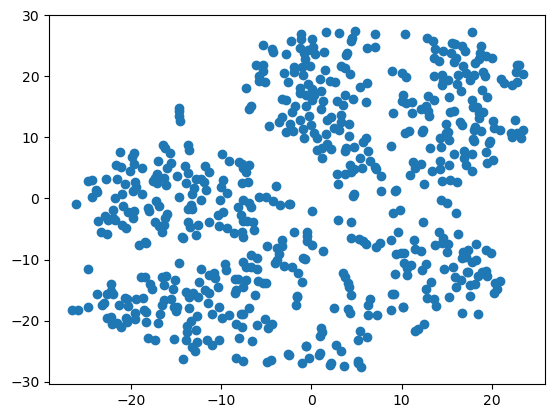

In [144]:
# Visualize the clusters
plt.scatter(df_myopia['X'], df_myopia['y'])
plt.show()

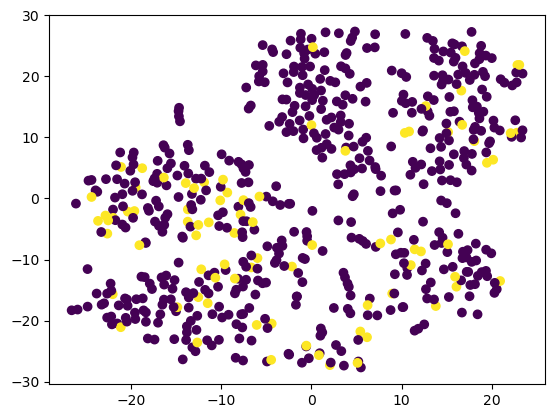

In [145]:
# Create scatterplot
plt.scatter(df_myopia["X"], df_myopia["y"], c=df_myopia["Myopic"])
plt.show()

In [146]:
labels = df_myopia["Myopic"]
labels.value_counts()

0    537
1     81
Name: Myopic, dtype: int64

# Part 3: Cluster analysis with K-means


In [148]:
# Finding best value of k (number of clusters)
inertia = []
k = [1,2,3,4,5,6,7,8,9,10]
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(pca_data_df)
    inertia.append(km.inertia_)

c:\Users\oaespino\Anaconda3\envs\mlenv\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  "KMeans is known to have a memory leak on Windows "


In [149]:
# Creating dataframe for elbow plot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

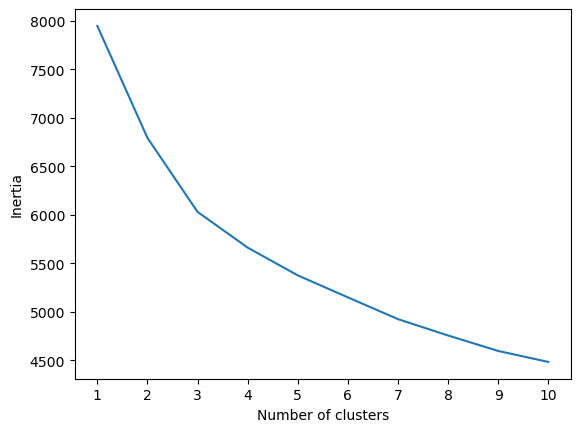

    k      inertia
0   1  7948.905345
1   2  6794.415695
2   3  6031.097742
3   4  5662.587617
4   5  5376.410589
5   6  5149.524688
6   7  4925.071941
7   8  4756.274760
8   9  4596.931418
9  10  4483.539918


In [150]:
# Elbow plot
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()
print(df_elbow)

In [151]:
# Use of KneeLocator to find the "elbow" in the scree plot (pip install of kneed was required)
from kneed import KneeLocator
kl = KneeLocator(range(1, 11), inertia, curve='convex', direction='decreasing')
best_k = kl.elbow
print('The optimum k value (number of clusters) is:', best_k)

The optimum k value (number of clusters) is: 3


### The elbow plot seems to show an inflexion at 3 clusters, and then diminishing returns after that

In [152]:
# Function to run differnt numbers of clusters
def get_clusters(k, data):
    # Initialize K-Means model
    model = KMeans(n_clusters=k, random_state=0)
    # Train the model
    model.fit(data)
    # Predict clusters
    predictions = model.predict(data)
    # Create return DataFrame with predicted clusters
    data["myopic"] = model.labels_
    return pca_data_df

In [153]:
# Trying with different numbers of k
clusters = get_clusters(3, pca_data_df) # k=3 was used based on previous analysis
clusters.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,myopic
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144,0
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031,1
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336,0
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400,0
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183,1


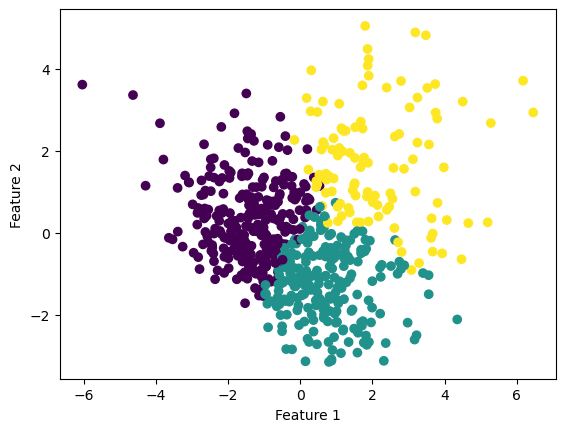

In [155]:
# Scatterplot of clustered data 
plt.scatter(clusters['principal component 1'], clusters['principal component 2'], c=clusters['myopic'])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Part 4: Recommendation


### Based on the analysis detailed above, it appears that a viable clustering strategy is to group patients in three groups. This is supported by the elbow plot, the KneeLocator algorithm's output, and the scatter plot of a 3-cluster solution, where not much overlap is observed.  